# Machine Learning 

## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
%matplotlib inline

import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

### replace to numeric method 

* This method replace the gearbox types to numeric values.

In [2]:
def replace_to_numeric(df):
    
    # replce the gearbox types to numric type
    replace_gearbox = {'אוטומטית':1,'ידנית':2,'רובוטית':3,'טיפטרוניק':4,'DSG':5,'סטפטרוניק':6,'dualogic':7} 
    df = df.replace(replace_gearbox)
    # replce the gearbox to int.
    df['Gearbox'] = df['Gearbox'].astype(int)

    return df

### convert str to numeric method

This method transform the string columns to numeric by used the label encoder.

In [3]:
def convert_str_to_numeric(df):

    # replcing the string cols to numeric cols.
    le = LabelEncoder()
    df['Area'] = le.fit_transform(df['Area'])
    df['Color'] = le.fit_transform(df['Color']) 
    df['manufacturer'] = le.fit_transform(df['manufacturer']) 
    df['type'] = le.fit_transform(df['type']) 

    return df

#####  Starting the machine learning !
* Here we called the big dataframe we created in the cleaning part.
* We drop unnessery columns.
* Called the replace to numeric method.
* present the info of the dataframe which help us understand better the dataframe.

In [4]:
df = pd.read_csv('./all_cars.csv')
df = replace_to_numeric(df)
df.drop(['Unnamed: 0'], axis = 1,inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5386 entries, 0 to 5385
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           5386 non-null   float64
 1   Year            5386 non-null   float64
 2   Hand            5386 non-null   float64
 3   Kilometer       5386 non-null   float64
 4   Area            5386 non-null   object 
 5   Gearbox         5386 non-null   int64  
 6   Engine capcity  5386 non-null   float64
 7   Color           5386 non-null   object 
 8   manufacturer    5386 non-null   object 
 9   type            5386 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 420.9+ KB


In [5]:
df

,price,Year,Hand,Kilometer,Area,Gearbox,Engine capcity,Color,manufacturer,type
0,28000.0,2014.0,3.0,158000.0,פתח תקוה והסביבה,1,1000.0,שחור,יונדאי,i10
1,30000.0,2013.0,5.0,117000.0,מושבים בשפלה,1,1400.0,אפור,יונדאי,i20
2,33000.0,2011.0,3.0,105000.0,נס ציונה - רחובות,1,1560.0,אפור,יונדאי,i25
3,28000.0,2013.0,2.0,220000.0,פתח תקוה והסביבה,1,1590.0,כחול מטאלי,יונדאי,i30cw
4,21000.0,2010.0,3.0,167000.0,פתח תקוה והסביבה,1,1600.0,תכלת,יונדאי,i30cw
...,...,...,...,...,...,...,...,...,...,...
5381,45000.0,2009.0,2.0,2.0,ירושלים והסביבה,1,1598.0,שחור,מיני,קופר
5382,180000.0,2021.0,1.0,3000.0,מושבים בצפון,1,1499.0,אפור עכבר,מיני,קופר
5383,34000.0,2012.0,3.0,190000.0,מושבים במרכז,2,1598.0,קרם,מיני,ONE
5384,150000.0,2017.0,4.0,65000.0,פתח תקוה והסביבה,1,1998.0,כסוף,מיני,JCW


Here we split the data frame into 2 data frames by target column to predict and the rest of the table.

In [6]:
def target_column_to_split(df, target_column):
    
    TRAINING_FEATURES = df.columns[df.columns != target_column]
    TARGET_FEATURE = target_column

    X = df[TRAINING_FEATURES]
    y = df[TARGET_FEATURE]
    
    return X,y

Here we called the train test split method. We set the test size to 0.2 to optimal result for our data.

In [2]:
def train(X,y):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 1)
                       
    return x_train, x_test, y_train, y_test

Here we train the dataframe with linearRegression model by calling the method fit.

In [8]:
def train_regression_model(X_train, y_train):
    
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)
        
    return linear_regression

Here we test our forecasting capabilities

In [3]:
def predict_regression(regressor, X_test):

    y_pred = regressor.predict(X_test)
    
    return y_pred

Here we rank our predictability according to r2_score

In [10]:
def evaluate_performance(y_test,y_predicted):
    
    evaluate_value = r2_score(y_test,y_predicted)
    
    return evaluate_value  

# Car model - price

building the price prediction model with linear regression.

In [11]:
dfCopy = df.copy()
dfCopy.drop(['Area','Color','manufacturer','type'], axis = 1,inplace = True)

target_column = 'price'
X,y = target_column_to_split(dfCopy,target_column)

x_train, x_test, y_train, y_test = train(X,y)

price_model = train_regression_model(x_train,y_train)

y_pred = predict_regression(price_model,x_test)

evaluate = evaluate_performance(y_test,y_pred)
print(evaluate)

0.6430708509773704


evaluate = 0.6430708509773704


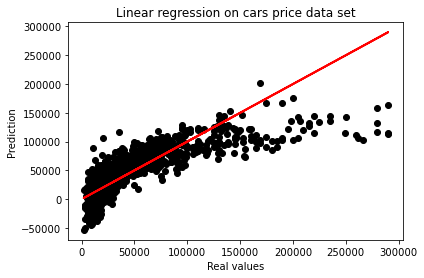

In [12]:
print("evaluate =",evaluate)
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Linear regression on cars price data set')
plt.xlabel('Real values')
plt.ylabel('Prediction')
plt.show()

# Improving the car model - price 

We were not satisfied with our forecast results so we decided to improve the forecast results.
* We convert all string columns to libraries.
* We multiply columns whose correlation is the best.

In [13]:
dfCopy = df.copy()
dfCopy = convert_str_to_numeric(dfCopy)
dfCopy['year * kilometer'] = dfCopy['Year'] * dfCopy['Kilometer']
dfCopy['year * Hand'] = dfCopy['Year'] * dfCopy['Hand']
dfCopy['year * Engine capcity'] = dfCopy['Year'] * dfCopy['Engine capcity']


In [14]:
target_column = 'price'
X,y = target_column_to_split(dfCopy,target_column)

x_train, x_test, y_train, y_test = train(X,y)

price_model = train_regression_model(x_train,y_train)

y_pred = predict_regression(price_model,x_test)

evaluate = evaluate_performance(y_test,y_pred)
print(evaluate)

0.7304321138360714


evaluate = 0.7304321138360714


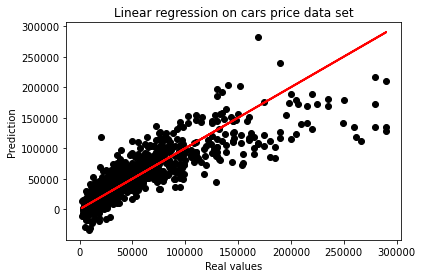

In [15]:
print("evaluate =",evaluate)
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Linear regression on cars price data set')
plt.xlabel('Real values')
plt.ylabel('Prediction')
plt.show()

# Car model - year 

building the year prediction model with linear regression.

In [16]:
dfCopy = df.copy()
dfCopy.drop(['Area','Color','manufacturer','type'], axis = 1,inplace = True)

target_column = 'Year'
X,y = target_column_to_split(dfCopy,target_column)

x_train, x_test, y_train, y_test = train(X,y)

year_model = train_regression_model(x_train,y_train)

y_pred = predict_regression(year_model,x_test)

evaluate = evaluate_performance(y_test,y_pred)

print(evaluate)

0.6723091618308419


evaluate = 0.6723091618308419


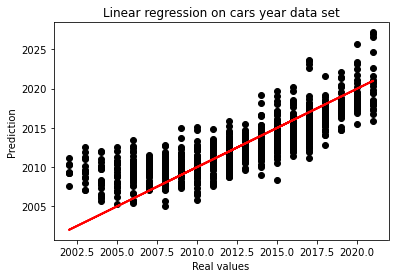

In [17]:
print("evaluate =",evaluate)
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Linear regression on cars year data set')
plt.xlabel('Real values')
plt.ylabel('Prediction')
plt.show()

# Improving the car model - year

We were not satisfied with our forecast results so we decided to improve the forecast results.

* We convert all string columns to libraries.
* We multiply columns whose correlation is the best.

In [18]:
dfCopy = df.copy()
dfCopy = convert_str_to_numeric(dfCopy)
dfCopy['price * kilometer'] = dfCopy['price'] * dfCopy['Kilometer']
dfCopy['Kilometer * Engine capcity'] = dfCopy['Kilometer'] * dfCopy['Engine capcity']

In [19]:
target_column = 'Year'
X,y = target_column_to_split(dfCopy,target_column)

x_train, x_test, y_train, y_test = train(X,y)

year_model = train_regression_model(x_train,y_train)

y_pred = predict_regression(year_model,x_test)

evaluate = evaluate_performance(y_test,y_pred)
print(evaluate)

0.71832972723348


evaluate = 0.71832972723348


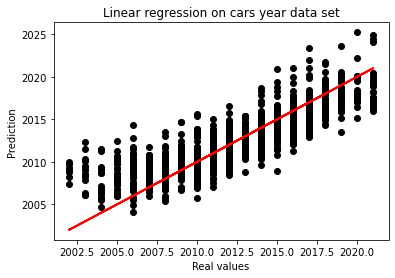

In [20]:
print("evaluate =",evaluate)
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Linear regression on cars year data set')
plt.xlabel('Real values')
plt.ylabel('Prediction')
plt.show()

# Predicting the impairment of the vehicle I purchased

* In this section we anticipate the impairment of the vehicle I purchased.
    * We let the user enter the price he bought the car and enter more information we need.
    * Then predict the depreciation of the vehicle.

In [21]:
def convert_user_input(df):
    
    df = replace_to_numeric(df)
    df = convert_str_to_numeric(df)
    df['Gearbox'] = df['Gearbox'].astype(int)
    df['Year'] = df['Year'].astype(int) 
    df['Hand'] = df['Hand'].astype(int)  
    df['Kilometer'] = df['Kilometer'].astype(int)  
    df['Engine capcity'] = df['Engine capcity'].astype(int)  
    df['year * kilometer'] = df['Year'] * df['Kilometer']
    df['year * Hand'] = df['Year'] * df['Hand']
    df['year * Engine capcity'] = df['Year'] * df['Engine capcity']
    
    return df

In [22]:
def Details_of_impairment(model):

    print('Enter the price you bought the vehicle:')
    current_price = input()
    print('Enter your vehicle year of manufacture:')
    year = input()
    print('Enter your vehicle hand:')
    hand = input()
    print('Enter the mileage that the vehicle travel:')
    kilometer = input()
    print('Enter your living area:')
    area = input()
    print('Enter your vehicle gearbox:')
    gearbox = input()
    print('Enter your vehicle engine capcity:')
    engine_capcity = input()
    print('Enter your vehicle color:')
    color = input()
    print('Enter your vehicle manufacturer:')
    manufacturer = input()
    print('Enter your vehicle type:')
    car_type = input()

    
    df_user = pd.DataFrame({"Year":year,
                       "Hand":hand,
                       "Kilometer":kilometer,
                       "Area":area,
                       "Gearbox":gearbox,
                       "Engine capcity":engine_capcity,
                       "Color":color,
                       "manufacturer":manufacturer,
                       "type":car_type},index=[0])

    df_user = convert_user_input(df_user)
    
    y_pred = predict_regression(model,df_user)  
    current_price = int(current_price)
    y_pred = int(y_pred)
    print()
    print("The impairment of your vehicle will be: ",current_price - y_pred)

In [23]:
Details_of_impairment(price_model)

Enter the price you bought the vehicle:
35000
Enter your vehicle year of manufacture:
2014
Enter your vehicle hand:
3
Enter the mileage that the vehicle travel:
158000
Enter your living area:
פתח תקוה והסביבה
Enter your vehicle gearbox:
אוטומטית
Enter your vehicle engine capcity:
1000
Enter your vehicle color:
שחור
Enter your vehicle manufacturer:
יונדאי
Enter your vehicle type:
i10

The impairment of your vehicle will be:  9394
